بسم الله

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import glob as gb
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
train_dir = r"C:\Users\pc\project CNN\seg_train\seg_train"
test_dir = r"C:\Users\pc\project CNN\seg_test\seg_test"

categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
img_size = 100 
def load_data(data_dir, categories):
    images = []
    labels = []
    
    for category in categories:
        category_path = os.path.join(data_dir, category)
        class_num = categories.index(category)  
        image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        
        for image_file in image_files:
            image_path = os.path.join(category_path, image_file)
            image = Image.open(image_path).resize((img_size, img_size))
            image = np.array(image)
            images.append(image)
            labels.append(class_num)
    
    return np.array(images), np.array(labels)

x_train, y_train = load_data(train_dir, categories)
x_test, y_test = load_data(test_dir, categories)

In [4]:
x_train[0]

array([[[247, 247, 245],
        [248, 248, 246],
        [248, 249, 246],
        ...,
        [248, 248, 248],
        [248, 248, 247],
        [247, 247, 245]],

       [[246, 246, 244],
        [247, 247, 245],
        [247, 248, 245],
        ...,
        [248, 248, 248],
        [248, 248, 247],
        [247, 247, 245]],

       [[246, 246, 244],
        [247, 247, 245],
        [247, 248, 245],
        ...,
        [249, 249, 249],
        [248, 248, 247],
        [247, 247, 245]],

       ...,

       [[ 54,  53,  51],
        [ 73,  72,  70],
        [ 76,  75,  73],
        ...,
        [ 82,  77,  74],
        [ 57,  52,  49],
        [ 46,  41,  38]],

       [[ 57,  56,  54],
        [ 50,  49,  47],
        [106, 105, 103],
        ...,
        [ 70,  65,  62],
        [ 45,  40,  37],
        [ 63,  58,  55]],

       [[ 61,  60,  58],
        [ 56,  55,  53],
        [ 86,  85,  83],
        ...,
        [ 37,  32,  29],
        [ 36,  31,  28],
        [ 54,  49,  46]]

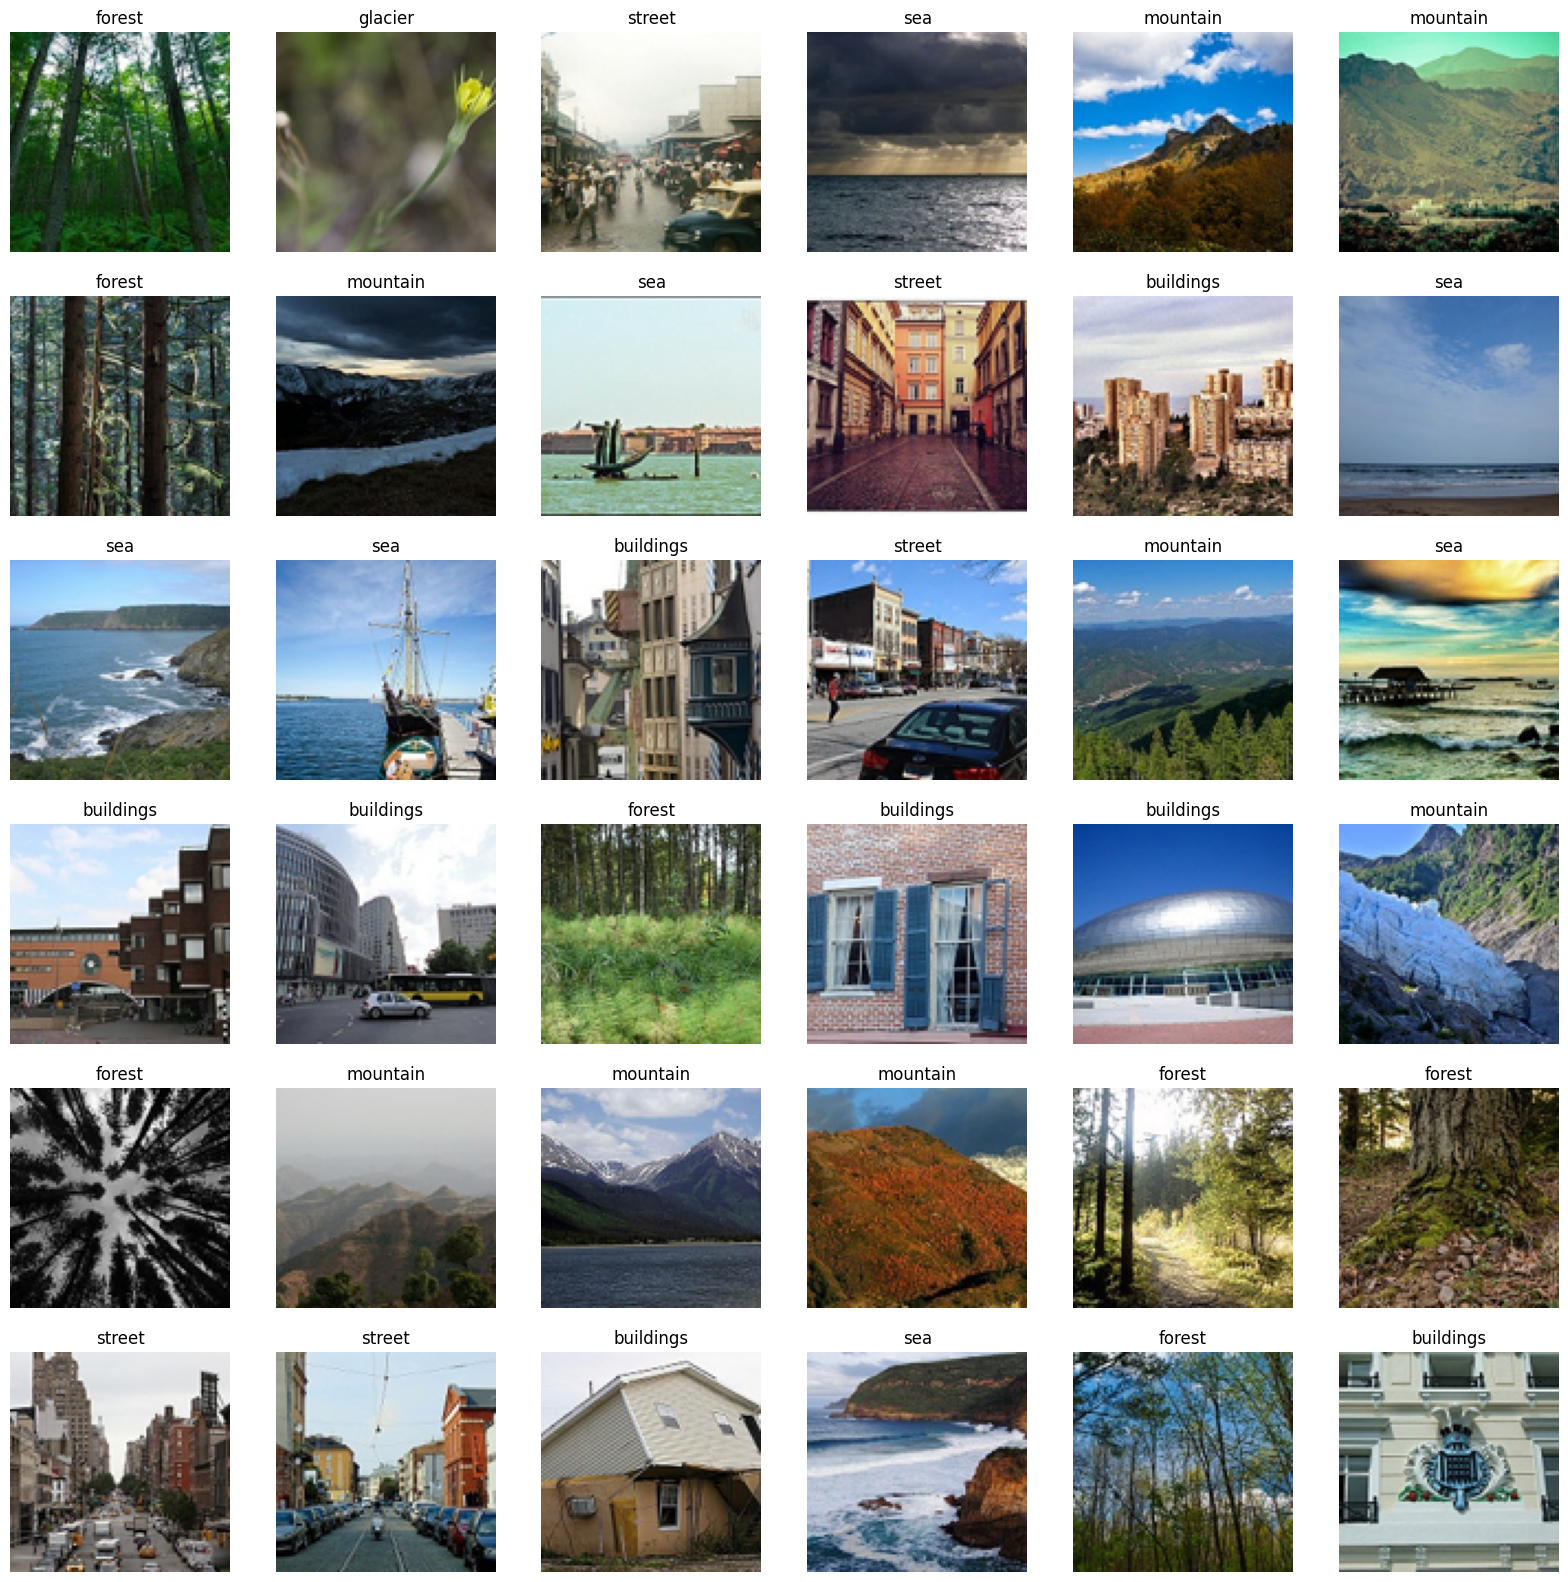

In [5]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])   
    plt.title(categories[y_train[i]])
    plt.axis('off')

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

In [7]:
x_train.shape

(14034, 100, 100, 3)

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train

array([[[[0.96862745, 0.96862745, 0.96078431],
         [0.97254902, 0.97254902, 0.96470588],
         [0.97254902, 0.97647059, 0.96470588],
         ...,
         [0.97254902, 0.97254902, 0.97254902],
         [0.97254902, 0.97254902, 0.96862745],
         [0.96862745, 0.96862745, 0.96078431]],

        [[0.96470588, 0.96470588, 0.95686275],
         [0.96862745, 0.96862745, 0.96078431],
         [0.96862745, 0.97254902, 0.96078431],
         ...,
         [0.97254902, 0.97254902, 0.97254902],
         [0.97254902, 0.97254902, 0.96862745],
         [0.96862745, 0.96862745, 0.96078431]],

        [[0.96470588, 0.96470588, 0.95686275],
         [0.96862745, 0.96862745, 0.96078431],
         [0.96862745, 0.97254902, 0.96078431],
         ...,
         [0.97647059, 0.97647059, 0.97647059],
         [0.97254902, 0.97254902, 0.96862745],
         [0.96862745, 0.96862745, 0.96078431]],

        ...,

        [[0.21176471, 0.20784314, 0.2       ],
         [0.28627451, 0.28235294, 0.2745098 ]

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout

In [12]:
model = Sequential()
model.add(Conv2D(150,kernel_size=(3,3),input_shape=(100,100,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(150,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(150,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(150,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(150,kernel_size=(3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(6,activation="softmax"))

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 150)    │         4,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 150)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 150)    │       202,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 150)    │       202,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 150)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 150)      │       202,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 1, 150)      │       202,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           906 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 815,706 (3.11 MB)

 Trainable params: 815,706 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile( optimizer= "adam"  , loss= "categorical_crossentropy" , metrics=["accuracy"])

In [15]:
epochs = 50
ThisModel = model.fit(x_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step - accuracy: 0.4624 - loss: 1.3026
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.6799 - loss: 0.8522
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7613 - loss: 0.6647
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.7953 - loss: 0.5737
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.8313 - loss: 0.4807
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.8277 - loss: 0.4708
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.8615 - loss: 0.3923
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.8698 - loss: 0.3709
Epoch 9/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.8845 - loss: 0.3211
Epoch 10/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.9005 - loss: 0.2795
Epoch 11/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.9091 - loss: 0.2593
Epoch 12/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
loss,acc=model.evaluate(x_test,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.8481 - loss: 1.2306


In [17]:
acc

0.82833331823349

In [18]:
loss

1.3273061513900757

In [19]:
model.save("Model.h5")